In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.signal import savgol_filter

Калибровка

In [2]:
data_red = np.loadtxt('красный изначально.txt')
data_red_shift = np.loadtxt('красный сдвинутый.txt')
data_green1 = np.loadtxt('зелёный диод1.txt')
data_green2 = np.loadtxt('зелёный диод2.txt')
data_green_shift = np.loadtxt('зеленый сдвинутый.txt')
data_rainbow = np.loadtxt("спектр диода.txt")
data_rainbow1 = np.loadtxt("для шкалы.txt")

In [3]:
def f(x,mu,sigma2,n):
    return n*np.exp(-(x-mu)**2/2/sigma2)

In [4]:
xdata = np.arange(0,data_green1.shape[0])

In [5]:
opt_red = opt.curve_fit(f,xdata,data_red[:,0],p0=[650,10,250])[0]
red_center = opt_red[0]
opt_red_shift = opt.curve_fit(f,xdata,data_red_shift[:,0],p0=[570,10,250])[0]
red_shift_center = opt_red_shift[0] 
opt_green1 = opt.curve_fit(f,xdata,data_green1[:,1],p0=[250,10,250])[0]
green1_center = opt_green1[0]
opt_green2 = opt.curve_fit(f,xdata,data_green1[:,1],p0=[250,10,250])[0]
green2_center = opt_green2[0]
opt_green_shift = opt.curve_fit(f,xdata,data_green_shift[:,1],p0=[250,10,250])[0]
green_shift_center = opt_green_shift[0]

In [6]:
l_step = (635.-532.)/(red_shift_center-green1_center)
l_grid = (xdata-xdata[int(green1_center)])*l_step + np.ones_like(xdata)*532

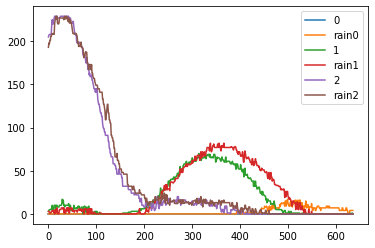

In [72]:
data_rainbow = np.loadtxt('пустая кювет.txt')#np.loadtxt("спектр диода.txt")
blue_wid = np.loadtxt('купорос.txt')
data_rainbow[:,2] = data_rainbow[:,2]-blue_cut#data_rainbow[:,2][200]
data_rainbow[:,1] = data_rainbow[:,1]-data_rainbow[:,1][100]
data_rainbow[:,0] = data_rainbow[:,0]-data_rainbow[:,0][400]
blue_wid[:,2] = blue_wid[:,2]-blue_cut#blue_wid[:,2][250]
blue_wid[:,1] = blue_wid[:,1]-blue_wid[:,1][100]
blue_wid[:,0] = blue_wid[:,0]-blue_wid[:,0][400]
for i in range(3):
    data_rainbow[:,i][data_rainbow[:,i]<0]=0
    blue_wid[:,i][blue_wid[:,i]<0]=0
for i in range (3):
    plt.plot(blue_wid[:,i],label="{}".format(i))
    plt.plot(data_rainbow[:,i],label="rain{}".format(i))
plt.legend()


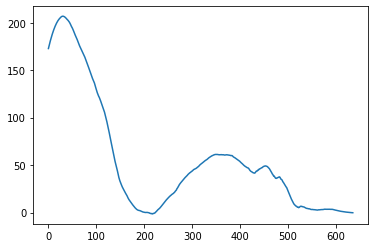

In [96]:
blue_cut = np.mean(np.loadtxt('пустая кювет.txt')[300:,2])
red_cut = np.max(np.loadtxt('купорос.txt')[:100,1])#np.max(np.loadtxt('пустая кювет.txt')[:100,1])
def intensity(arr):
    int_ar = np.zeros_like(l_grid)
    arr_add = arr.copy()
    arr_add[:,2] = arr_add[:,2]-blue_cut#np.mean(arr_add[350:,2])
    arr_add[:,1] = arr_add[:,1]-red_cut#np.max(arr_add[:130,1])#arr_add[:,1][100]
    arr_add[:,0] = arr_add[:,0]-np.max(arr_add[:400,0])#arr_add[:,0][400]
    for i in range(3):
        arr_add[:,i][arr_add[:,i]<0]=0
        #print(np.min(arr_add))
    for i in range(3):
        int_ar = int_ar + np.sqrt(arr_add[:,i])
        #print(np.min(int_ar))
    return savgol_filter(int_ar**2, 51, 2)
#w = savgol_filter(intensity(data_rainbow), 51, 2)
plt.plot(intensity(data_rainbow))


In [51]:
np.min(intensity(data_rainbow))

-26.484304932735427
-26.484304932735427
0.0
0.0
0.0
0.9886859966642595


2.7346428571428563

Для оранжевой обрезать зелёный на 400 где-то
для синей 250

Жидкости

In [79]:
pink_wid = np.loadtxt('розоовая в ширь.txt')
orange_wid = np.loadtxt('пыжажя жжа в толищну.txt')
empty = np.loadtxt('пустая кювет.txt')
blue_wid = np.loadtxt('купорос.txt')
green_wid = np.loadtxt('зелёная жжа.txt')
green_len = np.loadtxt('зелёная жжа в длину.txt')


In [98]:
int_pink = intensity(pink_wid)
int_empty = intensity(empty)
int_orange = intensity(orange_wid)
int_blue = intensity(blue_wid)
int_green_wid = intensity(green_wid)
int_green_len = intensity(green_len)

In [99]:
spec_pink = int_empty[int_pink>1]/int_pink[int_pink>1]
spec_orange = int_empty/int_orange[int_pink>1]
spec_blue = int_empty/int_blue
spec_green_wid = int_empty/int_green_wid
spec_green_len = int_empty/int_green_len

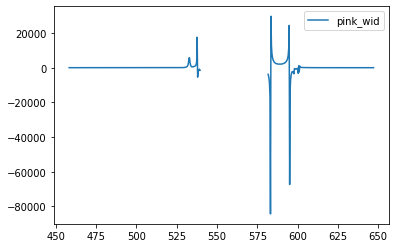

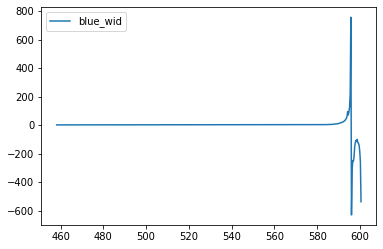

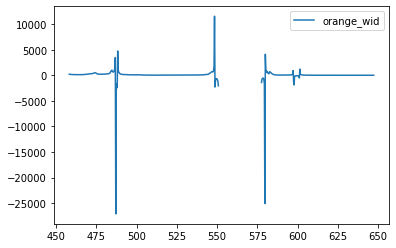

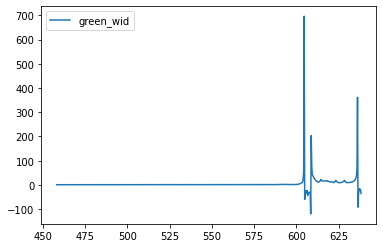

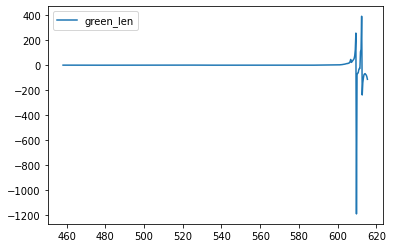

In [102]:
plt.plot(l_grid,spec_pink,label="pink_wid")
plt.legend()
plt.show()
plt.plot(l_grid,spec_blue,label="blue_wid")
plt.legend()
plt.show()
plt.plot(l_grid,spec_orange,label="orange_wid")
plt.legend()
plt.show()
plt.plot(l_grid,spec_green_wid,label="green_wid")
plt.legend()
plt.show()
plt.plot(l_grid,spec_green_len,label="green_len")
plt.legend()
plt.show()

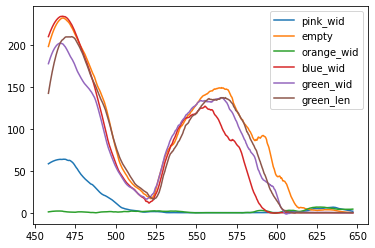

In [97]:
plt.plot(l_grid,intensity(pink_wid),label="pink_wid")
plt.plot(l_grid,intensity(empty),label="empty")
plt.plot(l_grid,intensity(orange_wid),label="orange_wid")
plt.plot(l_grid,intensity(blue_wid),label="blue_wid")
plt.plot(l_grid,intensity(green_wid),label="green_wid")
plt.plot(l_grid,intensity(green_len),label="green_len")
plt.legend()
plt.plot()

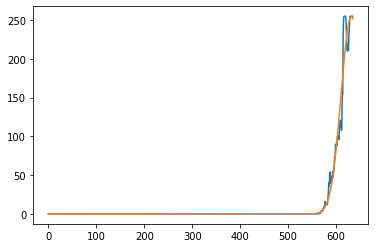

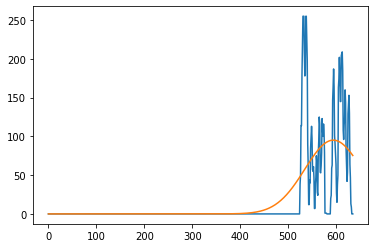

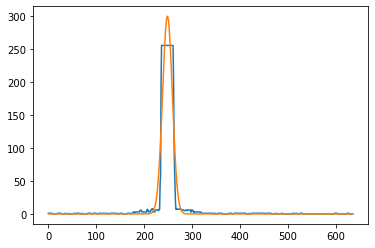

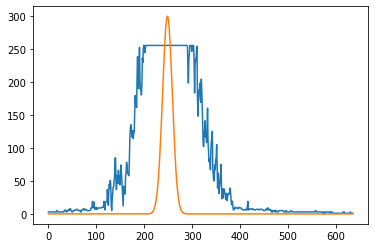

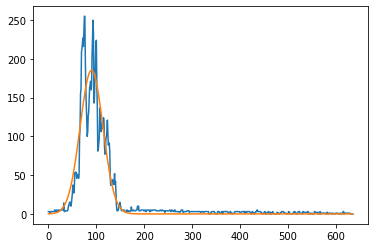

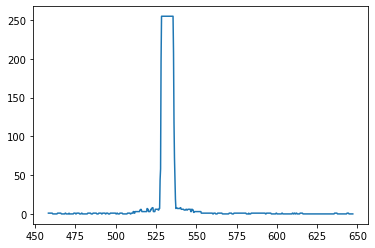

In [11]:
plt.plot(data_red[:,0])
plt.plot(f(xdata,*np.asarray(opt_red)))
plt.show()
plt.plot(data_red_shift[:,0])
plt.plot(f(xdata,*np.asarray(opt_red_shift)))
plt.show()
plt.plot(data_green1[:,1])
plt.plot(f(xdata,*np.asarray(opt_green1)))
plt.show()
plt.plot(data_green2[:,1])
plt.plot(f(xdata,*np.asarray(opt_green2)))
plt.show()
plt.plot(data_green_shift[:,1])
plt.plot(f(xdata,*np.asarray(opt_green_shift)))
plt.show()
plt.plot(l_grid,data_green1[:,1])


In [12]:
for i in range (mydata_red.shape[1]):
    plt.plot(mydata_red[:,i],label="{}".format(i))
plt.legend()
plt.show()
for i in range (mydata_green.shape[1]):
    plt.plot(mydata_green[:,i],label="{}".format(i))
plt.legend()
plt.show()
for i in range (mydata_green1.shape[1]):
    plt.plot(mydata_green1[:,i],label="{}".format(i))
plt.legend()
plt.show()

NameError: name 'mydata_red' is not defined

In [74]:
mydata_red = np.loadtxt('/Users/arpolkin/HSE/Ракета/красный.txt')
mydata_green = np.loadtxt('/Users/arpolkin/HSE/Ракета/зеленый.txt')
mydata_rainbow = np.loadtxt("/Users/arpolkin/HSE/Ракета/полный спеектр.txt")
mydata_red1 = np.loadtxt('/Users/arpolkin/HSE/Ракета — копия/красный3.txt')
mydata_green1 = np.loadtxt('/Users/arpolkin/HSE/Ракета — копия/зелёный31.txt')
mydata_green11 = np.loadtxt('/Users/arpolkin/HSE/Ракета — копия/зелёный32.txt')
mydata_rainbow1 = np.loadtxt("/Users/arpolkin/HSE/Ракета — копия/полный3.txt")

In [21]:
def f(x,mu,sigma2,n):
    return n*np.exp(-(x-mu)**2/2/sigma2)

In [82]:
xdata = np.arange(0,mydata_red.shape[0])
xdata1 = np.arange(0,mydata_red1.shape[0])

In [84]:
opt_red=opt.curve_fit(f,xdata,mydata_red[:,0],p0=[550,10,250])
opt_green=opt.curve_fit(f,xdata,mydata_green[:,1],p0=[120,10,250])
opt_green1=opt.curve_fit(f,xdata1,mydata_green1[:,1],p0=[270,30,300])

In [85]:
asd_red=opt_red[0]
asd_green=opt_green[0]
asd_green1 = opt_green1[0]

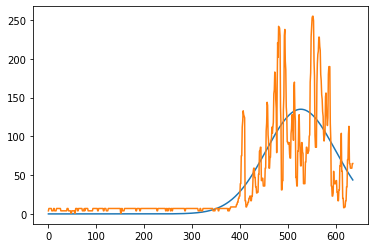

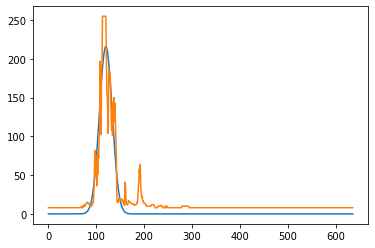

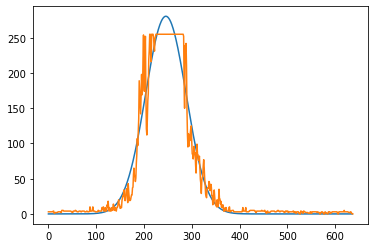

In [86]:
plt.plot(f(xdata,*np.asarray(asd_red)))
plt.plot(mydata_red[:,0])
plt.show()
plt.plot(f(xdata,*np.asarray(asd_green)))
plt.plot(mydata_green[:,1])
plt.show()
plt.plot(f(xdata,*np.asarray(asd_green1)))
plt.plot(mydata_green1[:,1])
plt.show()

In [87]:
red_center = np.array([asd_red[0],635])
green_center = np.array([asd_green[0],532])
green_center1 = np.array([asd_green1[0],532])

In [70]:
dl = (red_center[1]-green_center[1])/(red_center[0]-green_center[0])
l_grid = xdata*dl

In [71]:
sum_int = np.zeros_like(l_grid)
for i in range(3):
    sum_int = np.sqrt(mydata_rainbow[:,i])
sum_int = sum_int**2

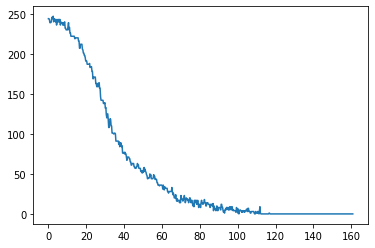

In [72]:
plt.plot(l_grid,sum_int)
plt.show()

In [91]:
i = 0
while mydata_red[i,0]-50<0:
    i+=1
j = 0
while mydata_red1[j,0]-50<0:
    j+=1
print(i,j)

403 591


In [94]:
red_center1 = np.array([j+(red_center[0]-i),635.])

In [99]:
sum_int = np.zeros_like(xdata1)
for i in range(3):
    sum_int = np.sqrt(mydata_rainbow1[:,i]-mydata_rainbow1[-1,i])
sum_int = sum_int**2

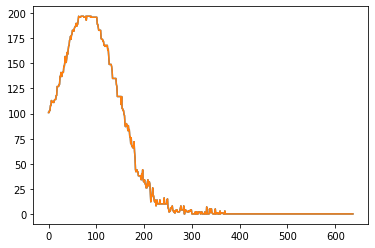

In [134]:
plt.plot(xdata1,sum_int)
plt.plot(xdata1,color_array[2])

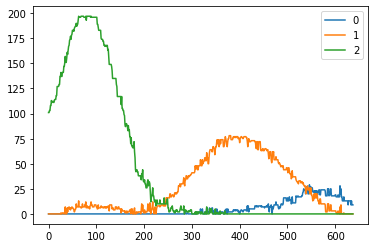

In [129]:
for i in range (mydata_red.shape[1]-1):
    plt.plot(color_array[i,:],label="{}".format(i))
plt.legend()
plt.show()

In [123]:
red_rainbow = mydata_rainbow1[:,0]-mydata_rainbow1[0,0]
red_rainbow[red_rainbow<0] = 0
green_rainbow = mydata_rainbow1[:,1]-mydata_rainbow1[1,1]
blue_rainbow = mydata_rainbow1[:,2]-mydata_rainbow1[300,2]
blue_rainbow[blue_rainbow<0]=0
green_rainbow[green_rainbow<0]=0
color_array = np.array([red_rainbow,green_rainbow,blue_rainbow])

0
1
2


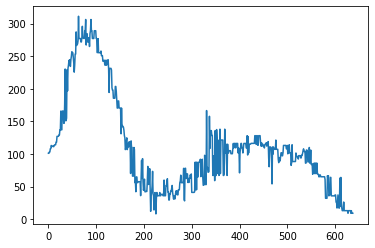

In [142]:
sum_int = np.zeros_like(xdata1)
for i in range(3):
    sum_int = sum_int + np.sqrt(color_array[i,:])
    print(i)
sum_int = sum_int**2
plt.plot(xdata1,sum_int)

In [51]:
data_rainbow[:,2][data_rainbow[:,2]<0]=0

**Новое начало**

In [72]:
x = np.arange(10)
y = x.copy()
y +=1

In [73]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [74]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])